In [1]:
import numpy as np
from numpy import sqrt
from chaos_game import *
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [2]:
params = {
    'figure.figsize': (11,28),
}
plt.rcParams.update(params)

# Number of points to construct
N = int(1e5)
# size of the final image
size = 1024
# interval between frames when rendering the animation
interval = 250

## Plot the Bat-Signal

In [3]:
xs = np.linspace(-7.25, 7.25, 100) 
ys = np.linspace(-5, 5, 100)

x, y = np.meshgrid(xs, ys)

eq1 = ((x/7)**2*sqrt(abs(abs(x)-3)/(abs(x)-3))+(y/3)**2*sqrt(abs(y+3/7*sqrt(33))/(y+3/7*sqrt(33)))-1)
eq2 = (abs(x/2)-((3*sqrt(33)-7)/112)*x**2-3+sqrt(1-(abs(abs(x)-2)-1)**2)-y)
eq3 = (9*sqrt(abs((abs(x)-1)*(abs(x)-.75))/((1-abs(x))*(abs(x)-.75)))-8*abs(x)-y)
eq4 = (3*abs(x)+.75*sqrt(abs((abs(x)-.75)*(abs(x)-.5))/((.75-abs(x))*(abs(x)-.5)))-y)
eq5 = (2.25*sqrt(abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
eq6 = (6*sqrt(10)/7+(1.5-.5*abs(x))*sqrt(abs(abs(x)-1)/(abs(x)-1))-(6*sqrt(10)/14)*sqrt(4-(abs(x)-1)**2)-y)

/home/sauxpa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/home/sauxpa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/home/sauxpa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/home/sauxpa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/home/sauxpa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/home/sauxpa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


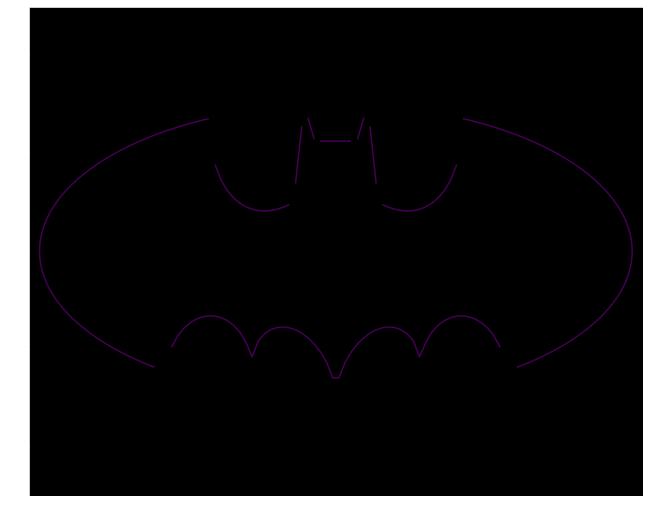

In [4]:
figure = plt.figure(figsize=(11,9))
css = []

for f in [eq1, eq2, eq3, eq4, eq5, eq6]:
    css.append(plt.contour(x, y, f, [0]))

## Extract coordinates from contour plot and rescale

In [5]:
batman_poly = []
freq = 6
for cs in css:
    ps = cs.collections[0].get_paths()
    for p in ps:
        v = p.vertices
        # rescale so that coordinate are in [0,1]
        # also subsample to get a polygon with a reasonable number of edges
        # (with too many edges, one looses the Sierpinski visual)
        x = (v[::freq,0]+8)/16
        y = (v[::freq,1]+3)/6
        batman_poly += list(zip(x,y))

## Check the Bat-Signal

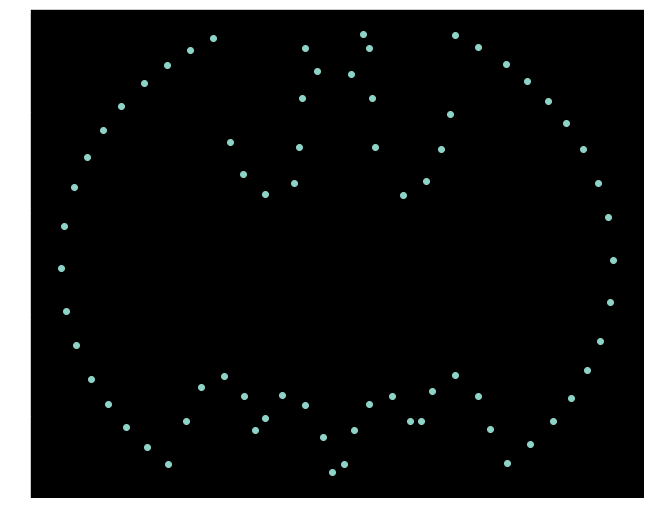

In [6]:
figure = plt.figure(figsize=(11,9))
plt.scatter(np.array(batman_poly)[:,0], np.array(batman_poly)[:,1])

## Batmaaaaan!

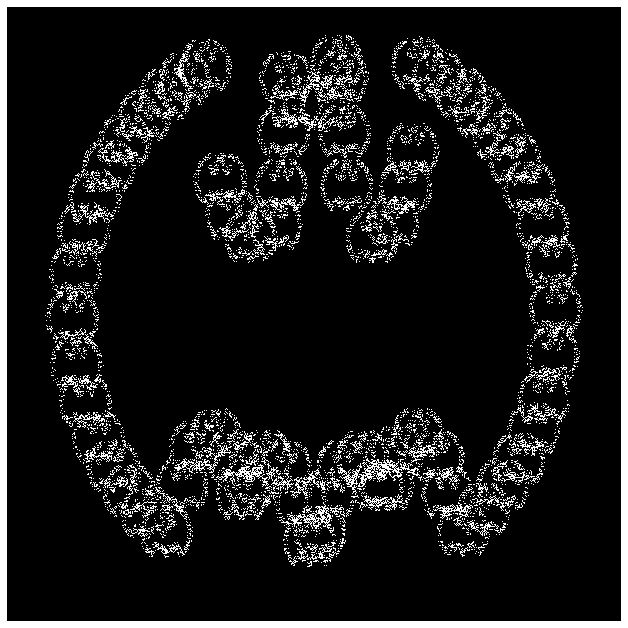

In [7]:
w = 0.9
x, y = play_game(N, w, batman_poly)
im = render_image(x, y, size)
plt.axis('off')
plt.imshow(im)

## Animated Bat-Signal 

In [8]:
fig = plt.figure()

frames = 80
w = np.linspace(0.65, 0.99, frames)

x, y = play_game(N, w[0], batman_poly)
im = plt.imshow(render_image(x, y, size), interpolation='none', animated=True)

def init():
    x, y = play_game(N, w[0], batman_poly)
    im.set_data( render_image(x, y, size))
    return [im]

def animate(i):
    x, y = play_game(N, w[i], batman_poly)
    im.set_data( render_image(x, y, size))
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=frames, interval=interval, 
                               blit=True, repeat=True)
plt.axis('off')
plt.close()

In [ ]:
anim.save('sierpinski_batman.gif', writer='imagemagick', fps=30)